**Module 2 Cars Dataset EDA and Regression**

**Nosson Weissman**

**DAV 6150 - Data Science**

**Professor James Topor**

**Summer, 2022**

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
header_file = open("imports-85.names", "r")
headers = header_file. readlines()
headers

['1. Title: 1985 Auto Imports Database\n',
 '\n',
 '2. Source Information:\n',
 '   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)\n',
 '   -- Date: 19 May 1987\n',
 '   -- Sources:\n',
 "     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's\n",
 '        Automotive Yearbook.\n',
 '     2) Personal Auto Manuals, Insurance Services Office, 160 Water\n',
 '        Street, New York, NY 10038 \n',
 '     3) Insurance Collision Report, Insurance Institute for Highway\n',
 '        Safety, Watergate 600, Washington, DC 20037\n',
 '\n',
 '3. Past Usage:\n',
 '   -- Kibler,~D., Aha,~D.~W., \\& Albert,~M. (1989).  Instance-based prediction\n',
 '      of real-valued attributes.  {\\it Computational Intelligence}, {\\it 5},\n',
 '      51--57.\n',
 '\t -- Predicted price of car using all numeric and Boolean attributes\n',
 '\t -- Method: an instance-based learning (IBL) algorithm derived from a\n',
 '\t    localized k-nearest neighbor algorithm.  Compare

In [88]:
temp_headers = headers[60:89]
cleaned_headers = []
for header in temp_headers:
    split_header = header.strip().split(' ')
    if len(split_header) > 3:
        cleaned_headers.append(split_header[1].strip()[:-1])
del cleaned_headers[3]
del cleaned_headers[3]
del cleaned_headers[3]
cleaned_headers

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [113]:
cars_df = pd.read_csv('./imports-85.data')
cars_df.columns = cleaned_headers
cars_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [191]:
cars_df_copy = cars_df[['height','curb-weight','width','length','wheel-base','engine-size','horsepower','peak-rpm','city-mpg']]

In [192]:
cars_df_copy.describe()

,height,curb-weight,width,length,wheel-base,engine-size,city-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,53.749020,2555.602941,65.916667,174.075000,98.806373,126.892157,25.240196
std,2.424901,521.960820,2.146716,12.362123,5.994144,41.744569,6.551513
min,47.800000,1488.000000,60.300000,141.100000,86.600000,61.000000,13.000000
25%,52.000000,2145.000000,64.075000,166.300000,94.500000,97.000000,19.000000
50%,54.100000,2414.000000,65.500000,173.200000,97.000000,119.500000,24.000000
75%,55.500000,2939.250000,66.900000,183.200000,102.400000,142.000000,30.000000
max,59.800000,4066.000000,72.300000,208.100000,120.900000,326.000000,49.000000


#### We can see that the describe method does not include a couple of columns, namely 'horsepwer' and 'peak-rpm'. Let's find out why

In [193]:
for col_name,col in cars_df_copy.transpose().iterrows():
    print(col_name,': ',col.unique())

height :  [48.8 52.4 54.3 53.1 55.7 55.9 52.0 53.7 56.3 53.2 50.8 50.6 59.8 50.2
 52.6 54.5 58.3 53.3 54.1 51.0 53.5 51.4 52.8 47.8 49.6 55.5 54.4 56.5
 58.7 54.9 56.7 55.4 54.8 49.4 51.6 54.7 55.1 56.1 49.7 56.0 50.5 55.2
 52.5 53.0 59.1 53.9 55.6 56.2 57.5]
curb-weight :  [2548 2823 2337 2824 2507 2844 2954 3086 3053 2395 2710 2765 3055 3230
 3380 3505 1488 1874 1909 1876 2128 1967 1989 2191 2535 2811 1713 1819
 1837 1940 1956 2010 2024 2236 2289 2304 2372 2465 2293 2734 4066 3950
 1890 1900 1905 1945 1950 2380 2385 2500 2410 2443 2425 2670 2700 3515
 3750 3495 3770 3740 3685 3900 3715 2910 1918 1944 2004 2145 2370 2328
 2833 2921 2926 2365 2405 2403 1889 2017 1938 1951 2028 1971 2037 2008
 2324 2302 3095 3296 3060 3071 3139 3020 3197 3430 3075 3252 3285 3485
 3130 2818 2778 2756 2800 3366 2579 2460 2658 2695 2707 2758 2808 2847
 2050 2120 2240 2190 2340 2510 2290 2455 2420 2650 1985 2040 2015 2280
 3110 2081 2109 2275 2094 2122 2140 2169 2204 2265 2300 2540 2536 2551
 2679 2714 2975

In [194]:
cars_df_copy['horsepower'] = pd.to_numeric(cars_df_copy['horsepower'])

ValueError: Unable to parse string "?" at position 129

In [195]:
cars_df_copy = cars_df_copy[cars_df_copy['horsepower'] != '?']
cars_df_copy['horsepower'] = pd.to_numeric(cars_df_copy['horsepower'])

In [196]:
cars_df_copy = cars_df_copy[cars_df_copy['peak-rpm'] != '?']
cars_df_copy['peak-rpm'] = pd.to_numeric(cars_df_copy['peak-rpm'])

In [197]:
cars_df_copy.describe()

,height,curb-weight,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,53.757921,2555.960396,65.910396,174.024752,98.833168,126.841584,104.222772,5125.990099,25.262376
std,2.423960,524.505148,2.156430,12.410839,6.017780,41.948614,39.810182,480.443680,6.580196
min,47.800000,1488.000000,60.300000,141.100000,86.600000,61.000000,48.000000,4150.000000,13.000000
25%,52.000000,2145.000000,64.025000,166.300000,94.500000,97.000000,70.000000,4800.000000,19.000000
50%,54.100000,2412.000000,65.500000,173.200000,97.000000,115.000000,95.000000,5200.000000,24.500000
75%,55.500000,2947.750000,66.900000,183.400000,102.400000,144.000000,116.000000,5500.000000,30.000000
max,59.800000,4066.000000,72.300000,208.100000,120.900000,326.000000,288.000000,6600.000000,49.000000


In [198]:
cars_df_copy[cars_df_copy.isnull().any(axis=1)]
#it appears that we don't have any NANs in this df

,height,curb-weight,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg


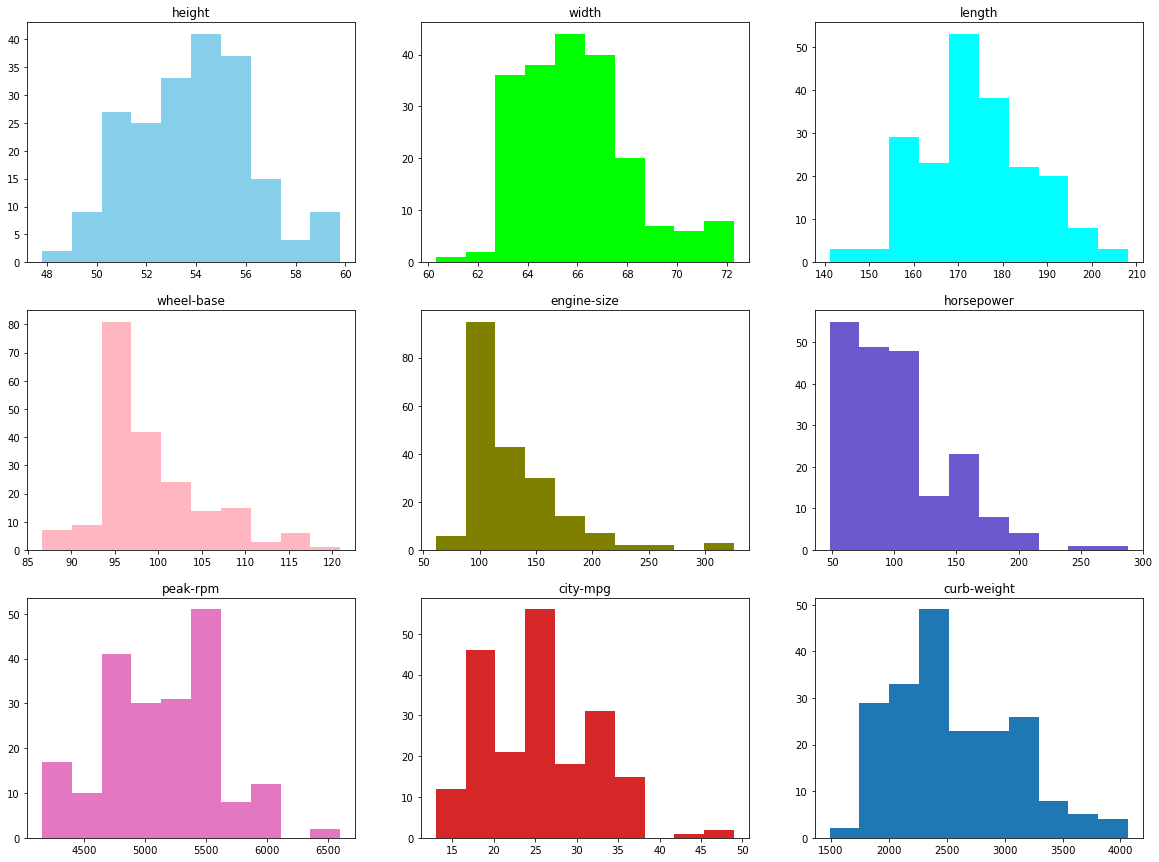

In [202]:
fig, axs  = plt.subplots(3,3,facecolor='white')
fig.set_size_inches(20,15)
axs[0,0].hist(cars_df_copy.height,color='skyblue')
axs[0,0].set_title('height')
axs[0,1].hist(cars_df_copy.width,color='lime')
axs[0,1].set_title('width')
axs[0,2].hist(cars_df_copy.length,color='cyan')
axs[0,2].set_title('length')
axs[1,0].hist(cars_df_copy['wheel-base'],color='lightpink')
axs[1,0].set_title('wheel-base')
axs[1,1].hist(cars_df_copy['engine-size'],color='olive')
axs[1,1].set_title('engine-size')
axs[1,2].hist(cars_df_copy['horsepower'],color='slateblue')
axs[1,2].set_title('horsepower')
axs[2,0].hist(cars_df_copy['peak-rpm'],color='tab:pink')
axs[2,0].set_title('peak-rpm')
axs[2,1].hist(cars_df_copy['city-mpg'],color='tab:red')
axs[2,1].set_title('city-mpg')
axs[2,2].hist(cars_df_copy['curb-weight'],color='tab:blue')
axs[2,2].set_title('curb-weight')
plt.show()

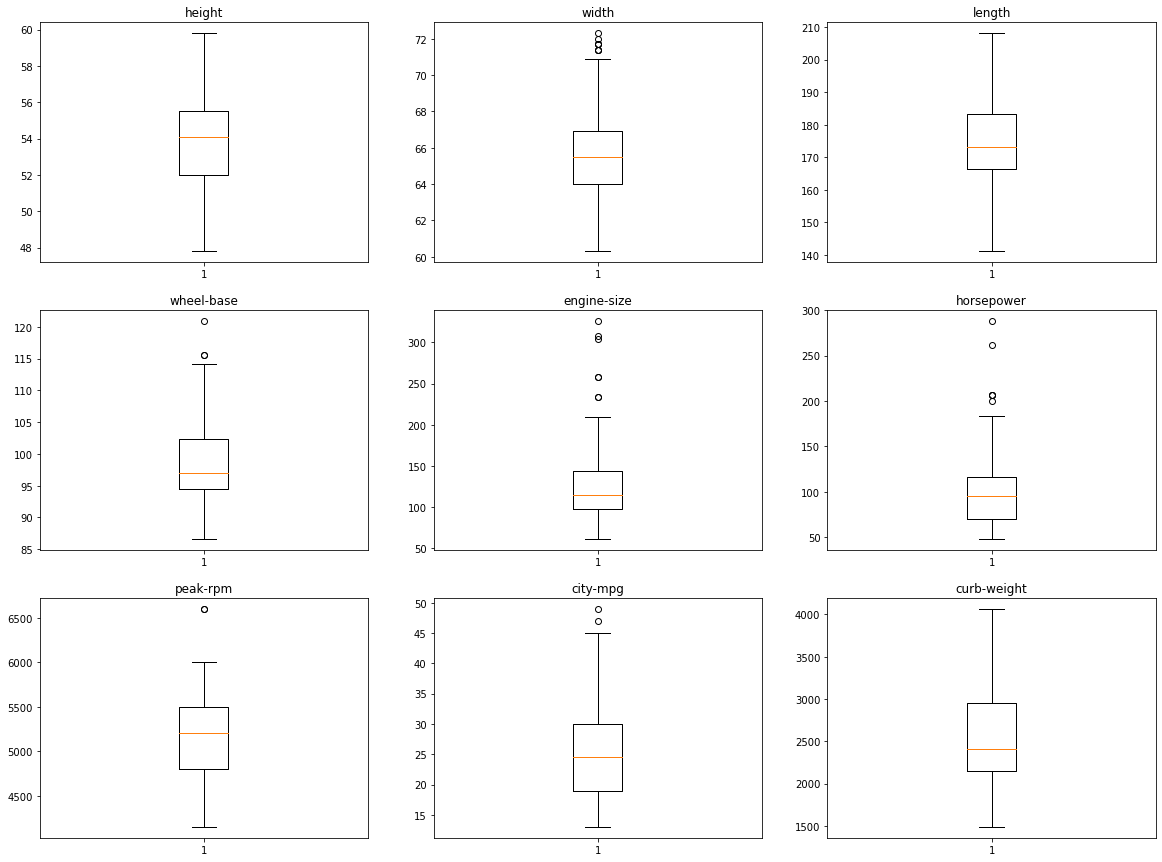

In [204]:
fig, axs  =plt.subplots(3,3)
fig.set_size_inches(20,15)
axs[0,0].boxplot(cars_df_copy.height)
axs[0,0].set_title('height')
axs[0,1].boxplot(cars_df_copy.width)
axs[0,1].set_title('width')
axs[0,2].boxplot(cars_df_copy.length)
axs[0,2].set_title('length')
axs[1,0].boxplot(cars_df_copy['wheel-base'])
axs[1,0].set_title('wheel-base')
axs[1,1].boxplot(cars_df_copy['engine-size'])
axs[1,1].set_title('engine-size')
axs[1,2].boxplot(cars_df_copy['horsepower'])
axs[1,2].set_title('horsepower')
axs[2,0].boxplot(cars_df_copy['peak-rpm'])
axs[2,0].set_title('peak-rpm')
axs[2,1].boxplot(cars_df_copy['city-mpg'])
axs[2,1].set_title('city-mpg')
axs[2,2].boxplot(cars_df_copy['curb-weight'])
axs[2,2].set_title('curb-weight')
plt.show()

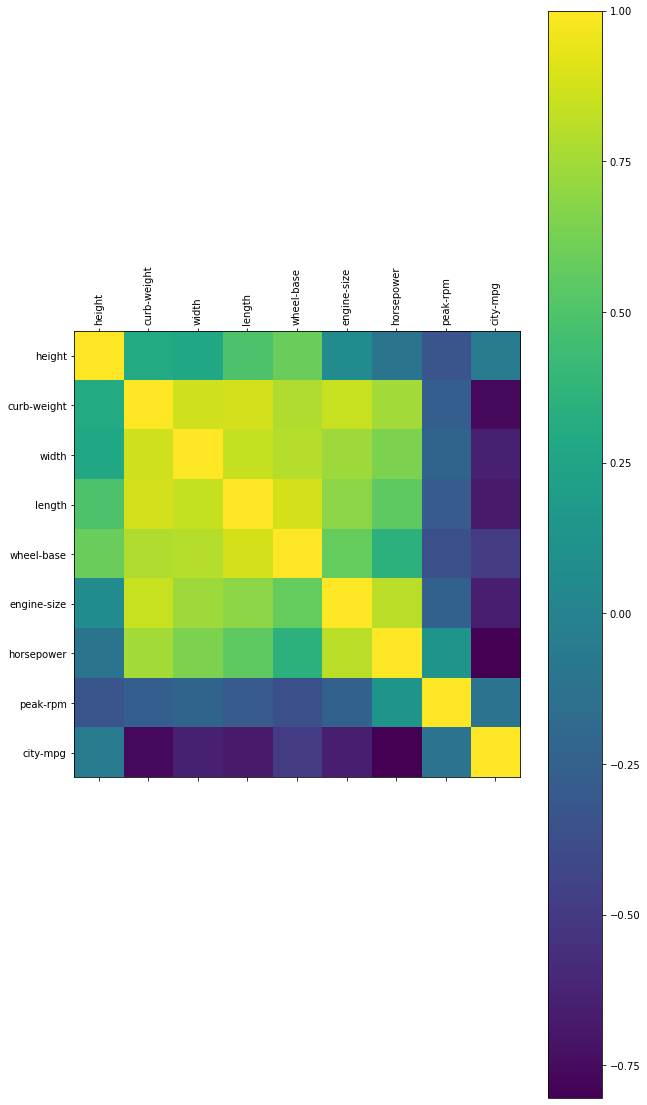

In [238]:
fig, ax = plt.subplots(figsize=(10,20))
fig.colorbar(cax)
ax.matshow(cars_df_copy.corr())
plt.xticks(range(len(cars_df_copy.columns)), cars_df_copy.columns,rotation='vertical')
plt.yticks(range(len(cars_df_copy.columns)), cars_df_copy.columns)
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cars_df_copy.corr(), interpolation='nearest')
# fig.colorbar(cax)

# xaxis = np.arange(len(list(cars_df_copy.columns)))
# ax.set_xticks(cars_df_copy.columns)
# ax.set_yticks(cars_df_copy.columns)
# ax.set_xticklabels(cars_df_copy.columns)
# ax.set_yticklabels(cars_df_copy.columns)


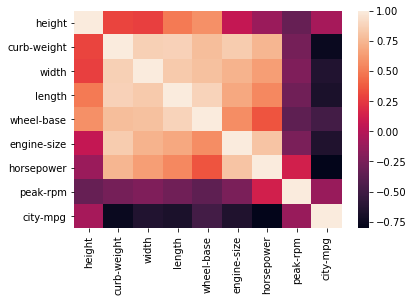

In [221]:
sns.heatmap(cars_df_copy.corr(), 
        xticklabels=cars_df_copy.columns,
        yticklabels=cars_df_copy.columns)
plt.show()

['height',
 'curb-weight',
 'width',
 'length',
 'wheel-base',
 'engine-size',
 'horsepower',
 'peak-rpm',
 'city-mpg']